<a href="https://colab.research.google.com/github/RuslanMavlitov/IDE/blob/master/%D0%9C%D0%B5%D1%80%D1%8B_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.cluster import KMeans

##Задание 4.1

Так как изначально данные были представлены для решения задачи классификации, то они находятся в разных файлах (обучающая и тестовая выборки в соотношении 70/30). Соедините признаки так, чтобы сначала шла обучающая выборка, а затем — тестовая, и отдельно соедините значения целевых переменных (разумеется, в том же порядке).

In [12]:
X_train = np.loadtxt("/content/sample_data/train.txt")
y_train = np.loadtxt("/content/sample_data/train_labels.txt")
 
X_test = np.loadtxt("/content/sample_data/test.txt")
y_test = np.loadtxt("/content/sample_data/test_labels.txt")
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X.shape

(10299, 561)

##Задание 4.2

Теперь найдите число различных активностей, то есть на сколько кластеров в идеале должны разделиться наблюдения.

In [13]:
np.unique(y)

array([1., 2., 3., 4., 5., 6.])

##Задание 4.3

Далее необходимо отмасштабировать признаки. Будем использовать для этого алгоритм StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта, предварительно округлив его до двух знаков после точки-разделителя.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
print(f'первое значение в самой первой строке равно {X_norm[0][0]:.2f}')

первое значение в самой первой строке равно 0.21


##Задание 4.4

Пора переходить к кластеризации. Для начала определите оптимальное количество кластеров, используя внутренние меры кластеризации. Используйте все известные вам коэффициенты, реализуемые в библиотеке sklearn: коэффициент силуэта, индекс Калински — Харабаса и индекс Дэвиса — Болдина. В качестве алгоритма возьмите k-means++, в качестве значения параметра random_state — число 42.

Выведите оптимальное количество кластеров для каждой метрики, перебирая значения от 2 до 9 включительно. Также введите значение каждой метрики, округлённое до двух знаков после точки-разделителя.

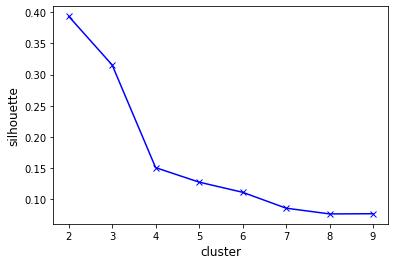

In [18]:
def get_silhouette(cluster_num, df):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(df)
    silhouette = silhouette_score(df, k_means.labels_, metric='euclidean')
    return silhouette

from sklearn.metrics import silhouette_score

silhouettes = []
for i in range(2, 10):
    silhouettes.append(get_silhouette(i ,X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-')

In [32]:
round(max(silhouettes), 2)

0.39

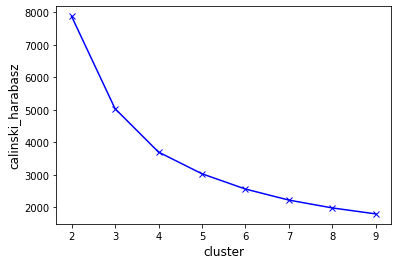

In [19]:
def get_calinski_harabasz(cluster_num, df):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(df)
    calinski_harabasz = calinski_harabasz_score(df, k_means.labels_)
    return calinski_harabasz

from sklearn.metrics import calinski_harabasz_score

calinskis = []
for i in range(2, 10):
    calinskis.append(get_calinski_harabasz(i ,X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("calinski_harabasz", fontsize=12)
plt.plot([i for i in range(2, 10)], calinskis, 'xb-')

In [31]:
round(max(calinskis), 2)

7880.81

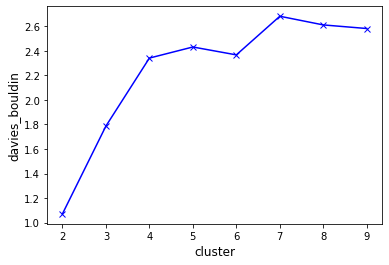

In [20]:
def get_davies_bouldin(cluster_num, df):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(df)
    davies_bouldin = davies_bouldin_score(df, k_means.labels_)
    return davies_bouldin

from sklearn.metrics import davies_bouldin_score

davies_bouldins = []
for i in range(2, 10):
    davies_bouldins.append(get_davies_bouldin(i ,X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("davies_bouldin", fontsize=12)
plt.plot([i for i in range(2, 10)], davies_bouldins, 'xb-')

In [30]:
round(min(davies_bouldins), 2)

1.07

##Задание 4.5

Теперь давайте оценим качество кластеризации с точки зрения внешних мер. Реализуйте кластеризацию с помощью алгоритма k-means. Пусть количество кластеров будет соответствовать количеству активностей. Параметр random_state = 42. В качестве ответов введите значения получившихся мер(Однородность, полнота и ARI (скорректированный индекс Рэнда)), предварительно округлив их до двух знаков после точки-разделителя.

In [47]:
km =  KMeans(n_clusters=6, random_state=42)
km.fit(X_norm)
y_pred = km.labels_

from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score

homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
adjusted_rand = adjusted_rand_score(y, y_pred)


print(f'Однородность равна {homogeneity:.2f}')
print(f'Полнота равна {completeness:.2f}')
print(f'Скорректированный индекс Рэнда равен {adjusted_rand:.2f}')

Однородность равна 0.54
Полнота равна 0.58
Скорректированный индекс Рэнда равен 0.42


##Задание 4.6

Выясните, к каким кластерам были преимущественно отнесены различные активности (т. е. в какой кластер попало большинство наблюдений с этой активностью).

In [48]:
index = ['ходьба', 'подъём', 'спуск', 'сидение', 'стояние', 'лежание']

df = pd.crosstab(y, km.labels_)
df.index = index
df.columns = list(range(1,7))
df

,1,2,3,4,5,6
ходьба,0,903,0,742,77,0
подъём,2,1242,0,295,5,0
спуск,0,321,0,889,196,0
сидение,451,1,91,0,0,1234
стояние,566,0,0,0,0,1340
лежание,330,5,1556,0,0,53


##Задание 4.7

Теперь попробуйте реализовать алгоритм k-means для двух кластеров (для того числа активностей, которое является оптимальным с точки зрения внутренних мер) и снова посмотреть, как алгоритм разобьёт активности по кластерам.

In [45]:
km_2 =  KMeans(n_clusters=2, random_state=42)
km_2.fit(X_norm)

df_2 = pd.crosstab(y, km_2.labels_)
df_2.index = ['ходьба', 'подъём', 'спуск', 'сидение', 'стояние', 'лежание']
df_2.columns = list(range(1,3))
df_2

,1,2
ходьба,1722,0
подъём,1536,8
спуск,1406,0
сидение,3,1774
стояние,0,1906
лежание,12,1932


##Задание 4.8

Вычислите значение полноты для разбиения на два кластера алгоритмом k-means. Ответ округлите до двух знаков после точки-разделителя.

In [49]:
print(f'значение полноты для разбиения на два кластера алгоритмом k-means {completeness_score(y, km_2.labels_):.2f}')

значение полноты для разбиения на два кластера алгоритмом k-means 0.98


##Задание 4.10


Давайте сравним полученный результат с агломеративной иерархической кластеризацией. Реализуйте её также для двух кластеров и вычислите значение полноты.
1. Какой алгоритм показывает наилучшее качество, если судить по полноте?
2. Какое значение полноты получилось для агломеративной кластеризации?

In [51]:
from sklearn.cluster import AgglomerativeClustering

ag_cl = AgglomerativeClustering(n_clusters=2).fit(X_norm)
print(f"значение полноты получилось для агломеративной кластеризаци {completeness_score(y, ag_cl.labels_):.2f}")

значение полноты получилось для агломеративной кластеризаци 1.00
